# Imports

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load in LLM Randomness Data

In [2]:
df = pd.read_csv('results-200.csv')
df.shape

(5600, 8)

# Genereate Programmatic Random Data

In [3]:
# Set the seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define the number of runs to generate for each range
num_runs = 200

# Prepare a list to collect new rows for python-random and python-numpy
new_rows = []

# Loop over each unique range in the DataFrame
for _, row in df[['range_min', 'range_max']].drop_duplicates().iterrows():
    range_min = row['range_min']
    range_max = row['range_max']
    
    # Generate 'python-random' method results
    for _ in range(num_runs):
        response = random.uniform(range_min, range_max)
        normalized_response = (response - range_min) / (range_max - range_min)
        new_rows.append({
            'run': _,
            'generation_method': 'python-random',
            'range_min': range_min,
            'range_max': range_max,
            'response': response,
            'normalized_response': normalized_response,

            # # add NaN vals for every column that isn't 'generation_method', 'range_min', 'range_max', 'response', 'normalized_response'
            # **{col: np.nan for col in df.columns if col not in ['generation_method', 'range_min', 'range_max', 'response', 'normalized_response']}
        })
    
    # Generate 'python-numpy' method results
    for _ in range(num_runs):
        response = np.random.uniform(range_min, range_max)
        normalized_response = (response - range_min) / (range_max - range_min)
        new_rows.append({
            'run': _,
            'generation_method': 'python-numpy',
            'range_min': range_min,
            'range_max': range_max,
            'response': response,
            'normalized_response': normalized_response

            # # add NaN vals for every column that isn't 'generation_method', 'range_min', 'range_max', 'response', 'normalized_response'
            # **{col: np.nan for col in df.columns if col not in ['generation_method', 'range_min', 'range_max', 'response', 'normalized_response']}
        })

# Create a DataFrame from the new rows
new_df = pd.DataFrame(new_rows)

# Update the existing DataFrame to use 'generation_method' instead of 'generation_method'
df = df.rename(columns={'generation_method': 'generation_method'})

# Append the new random data to the original DataFrame
df = pd.concat([df, new_df], ignore_index=True)

print(df.shape)

# Display the first few rows of the updated DataFrame to verify
print(df.head())

(8400, 9)
   run  generation_method                                             prompt  \
0    0  chatgpt-4o-latest  Generate a random number between 0 and 100. It...   
1    0  chatgpt-4o-latest  Generate a random number between 0 and 10. It ...   
2    0  chatgpt-4o-latest  Generate a random number between -745 and -556...   
3    0  chatgpt-4o-latest  Generate a random number between -359 and 39. ...   
4    0  chatgpt-4o-latest  Generate a random number between 328 and 508. ...   

   range_min  range_max  response  raw_response is_valid  normalized_response  
0          0        100      94.0          94.0     True                  NaN  
1          0         10       3.0           3.0     True                  NaN  
2       -745       -556    -631.0        -631.0     True                  NaN  
3       -359         39    -230.0        -230.0     True                  NaN  
4        328        508     495.0         495.0     True                  NaN  


In [4]:
# normalized_response
# Calculate normalized_response column
df['normalized_response'] = (df['response'] - df['range_min']) / (df['range_max'] - df['range_min'])

# Display the first few rows to verify the calculation
print(df[['generation_method', 'range_min', 'range_max', 'response', 'normalized_response']].head())

   generation_method  range_min  range_max  response  normalized_response
0  chatgpt-4o-latest          0        100      94.0             0.940000
1  chatgpt-4o-latest          0         10       3.0             0.300000
2  chatgpt-4o-latest       -745       -556    -631.0             0.603175
3  chatgpt-4o-latest       -359         39    -230.0             0.324121
4  chatgpt-4o-latest        328        508     495.0             0.927778


In [5]:
# Calculate range_size by finding the absolute difference between range_max and range_min
df['range_size'] = df['range_max'] - df['range_min']

print(df['range_size'].unique().mean())

# Display the first few rows to verify the calculation
print(df[['range_min', 'range_max', 'range_size']].head())


490.42857142857144
   range_min  range_max  range_size
0          0        100         100
1          0         10          10
2       -745       -556         189
3       -359         39         398
4        328        508         180


In [6]:
# 1. Distribution of Random Values by Range
distribution = df.groupby(['generation_method', 'range_min', 'range_max'])['normalized_response'].apply(list).reset_index()
distribution['count'] = distribution['normalized_response'].apply(len)

# Display distribution for insight
print("Distribution of Random Values by Range:")
# print(distribution)
print(distribution)


Distribution of Random Values by Range:
         generation_method  range_min  range_max  \
0        chatgpt-4o-latest       -863        557   
1        chatgpt-4o-latest       -745       -556   
2        chatgpt-4o-latest       -647        489   
3        chatgpt-4o-latest       -359         39   
4        chatgpt-4o-latest          0         10   
5        chatgpt-4o-latest          0        100   
6        chatgpt-4o-latest        328        508   
7               gpt-4-0613       -863        557   
8               gpt-4-0613       -745       -556   
9               gpt-4-0613       -647        489   
10              gpt-4-0613       -359         39   
11              gpt-4-0613          0         10   
12              gpt-4-0613          0        100   
13              gpt-4-0613        328        508   
14       gpt-4o-2024-08-06       -863        557   
15       gpt-4o-2024-08-06       -745       -556   
16       gpt-4o-2024-08-06       -647        489   
17       gpt-4o-2024-08-

In [7]:
# 2. Mean and Standard Deviation of Responses for Each Range
stats = df.groupby(['generation_method', 'range_min', 'range_max'])['normalized_response'].agg(['mean', 'std']).reset_index()
print("Mean and Standard Deviation of Normalized Responses for Each Range:")
print(stats)

Mean and Standard Deviation of Normalized Responses for Each Range:
         generation_method  range_min  range_max      mean       std
0        chatgpt-4o-latest       -863        557  0.491528  0.243949
1        chatgpt-4o-latest       -745       -556  0.450635  0.246758
2        chatgpt-4o-latest       -647        489  0.406857  0.216187
3        chatgpt-4o-latest       -359         39  0.420276  0.220861
4        chatgpt-4o-latest          0         10  0.509000  0.273667
5        chatgpt-4o-latest          0        100  0.447650  0.283256
6        chatgpt-4o-latest        328        508  0.540083  0.262561
7               gpt-4-0613       -863        557  0.525866  0.212087
8               gpt-4-0613       -745       -556  0.479127  0.159990
9               gpt-4-0613       -647        489  0.413710  0.204372
10              gpt-4-0613       -359         39  0.515766  0.177403
11              gpt-4-0613          0         10  0.616500  0.156846
12              gpt-4-0613         

In [8]:
for method in df['generation_method'].unique():
    # print number of rows for each generation method
    print(f"Number of rows for {method}: {df[df['generation_method'] == method].shape[0]}")


Number of rows for chatgpt-4o-latest: 1400
Number of rows for gpt-4o-2024-08-06: 1400
Number of rows for gpt-4-0613: 1400
Number of rows for gpt-4o-mini-2024-07-18: 1400
Number of rows for python-random: 1400
Number of rows for python-numpy: 1400


# Analyses

In [9]:
# Group by model and range_size, calculate mean normalized_response
size_analysis = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['normalized_response'].mean().reset_index()
print("Normalized Mean by Generation Method and Range Size Bucket:")
print(size_analysis)


Normalized Mean by Generation Method and Range Size Bucket:
         generation_method   range_size  normalized_response
0        chatgpt-4o-latest      (0, 10]             0.509000
1        chatgpt-4o-latest    (10, 100]             0.447650
2        chatgpt-4o-latest  (100, 1000]             0.470332
3               gpt-4-0613      (0, 10]             0.616500
4               gpt-4-0613    (10, 100]             0.566250
5               gpt-4-0613  (100, 1000]             0.508390
6        gpt-4o-2024-08-06      (0, 10]             0.494000
7        gpt-4o-2024-08-06    (10, 100]             0.446200
8        gpt-4o-2024-08-06  (100, 1000]             0.499408
9   gpt-4o-mini-2024-07-18      (0, 10]             0.642000
10  gpt-4o-mini-2024-07-18    (10, 100]             0.572450
11  gpt-4o-mini-2024-07-18  (100, 1000]             0.496411
12            python-numpy      (0, 10]             0.504375
13            python-numpy    (10, 100]             0.484006
14            python-nump

In [10]:
# Group by model and range_size, calculate std deviation of normalized_response
std_analysis = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['normalized_response'].std().reset_index()
print("Standard Deviation by Generation Method and Range Size Bucket:")
print(std_analysis)


Standard Deviation by Generation Method and Range Size Bucket:
         generation_method   range_size  normalized_response
0        chatgpt-4o-latest      (0, 10]             0.273667
1        chatgpt-4o-latest    (10, 100]             0.283256
2        chatgpt-4o-latest  (100, 1000]             0.248853
3               gpt-4-0613      (0, 10]             0.156846
4               gpt-4-0613    (10, 100]             0.230194
5               gpt-4-0613  (100, 1000]             0.182368
6        gpt-4o-2024-08-06      (0, 10]             0.221833
7        gpt-4o-2024-08-06    (10, 100]             0.258361
8        gpt-4o-2024-08-06  (100, 1000]             0.250126
9   gpt-4o-mini-2024-07-18      (0, 10]             0.134261
10  gpt-4o-mini-2024-07-18    (10, 100]             0.139718
11  gpt-4o-mini-2024-07-18  (100, 1000]             0.172914
12            python-numpy      (0, 10]             0.293001
13            python-numpy    (10, 100]             0.294891
14            python-n

In [11]:
# Use range_size and normalized mean to check consistency
consistency_check = df.groupby(['generation_method', 'range_size'])['normalized_response'].agg(['mean', 'std']).reset_index()
print("Consistency Check Across Models by Range Size:")
print(consistency_check)


Consistency Check Across Models by Range Size:
         generation_method  range_size      mean       std
0        chatgpt-4o-latest          10  0.509000  0.273667
1        chatgpt-4o-latest         100  0.447650  0.283256
2        chatgpt-4o-latest         180  0.540083  0.262561
3        chatgpt-4o-latest         189  0.450635  0.246758
4        chatgpt-4o-latest         398  0.420276  0.220861
5        chatgpt-4o-latest        1136  0.406857  0.216187
6        chatgpt-4o-latest        1420  0.491528  0.243949
7               gpt-4-0613          10  0.616500  0.156846
8               gpt-4-0613         100  0.566250  0.230194
9               gpt-4-0613         180  0.530278  0.204065
10              gpt-4-0613         189  0.479127  0.159990
11              gpt-4-0613         398  0.515766  0.177403
12              gpt-4-0613        1136  0.413710  0.204372
13              gpt-4-0613        1420  0.525866  0.212087
14       gpt-4o-2024-08-06          10  0.494000  0.221833
15       

In [12]:
# Group by model and range_size, calculate validity rate
validity_by_size = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['is_valid'].mean().reset_index()
print("Validity Rate by Generation Method and Range Size:")
print(validity_by_size)


Validity Rate by Generation Method and Range Size:
         generation_method   range_size  is_valid
0        chatgpt-4o-latest      (0, 10]  1.000000
1        chatgpt-4o-latest    (10, 100]  1.000000
2        chatgpt-4o-latest  (100, 1000]  1.000000
3               gpt-4-0613      (0, 10]  1.000000
4               gpt-4-0613    (10, 100]  1.000000
5               gpt-4-0613  (100, 1000]  1.000000
6        gpt-4o-2024-08-06      (0, 10]  1.000000
7        gpt-4o-2024-08-06    (10, 100]  1.000000
8        gpt-4o-2024-08-06  (100, 1000]  0.998333
9   gpt-4o-mini-2024-07-18      (0, 10]  1.000000
10  gpt-4o-mini-2024-07-18    (10, 100]  1.000000
11  gpt-4o-mini-2024-07-18  (100, 1000]  1.000000
12            python-numpy      (0, 10]       NaN
13            python-numpy    (10, 100]       NaN
14            python-numpy  (100, 1000]       NaN
15           python-random      (0, 10]       NaN
16           python-random    (10, 100]       NaN
17           python-random  (100, 1000]       NaN

In [13]:
# Analyze model-specific patterns with range size
model_pattern = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['response'].apply(lambda x: x.mode().values[0]).reset_index()
print("Most Frequent Response by Generation Method and Range Size Bucket:")
print(model_pattern)

Most Frequent Response by Generation Method and Range Size Bucket:
         generation_method   range_size    response
0        chatgpt-4o-latest      (0, 10]    3.000000
1        chatgpt-4o-latest    (10, 100]   57.000000
2        chatgpt-4o-latest  (100, 1000] -732.000000
3               gpt-4-0613      (0, 10]    7.000000
4               gpt-4-0613    (10, 100]   37.000000
5               gpt-4-0613  (100, 1000] -657.000000
6        gpt-4o-2024-08-06      (0, 10]    7.000000
7        gpt-4o-2024-08-06    (10, 100]   42.000000
8        gpt-4o-2024-08-06  (100, 1000]  472.000000
9   gpt-4o-mini-2024-07-18      (0, 10]    7.000000
10  gpt-4o-mini-2024-07-18    (10, 100]   57.000000
11  gpt-4o-mini-2024-07-18  (100, 1000] -612.000000
12            python-numpy      (0, 10]    0.050616
13            python-numpy    (10, 100]    0.552212
14            python-numpy  (100, 1000] -742.951684
15           python-random      (0, 10]    0.004059
16           python-random    (10, 100]    0.0571

# Plots

In [14]:
# At the start of your notebook, after your imports, add:
# Define a consistent color palette for generation methods
custom_palette = {
    "chatgpt-4o-latest": "#1f77b4",  # Blue
    "gpt-4-0613": "#ff7f0e",         # Orange
    "gpt-4o-2024-08-06": "#2ca02c",  # Green
    "gpt-4o-mini-2024-07-18": "#9467bd",  # Purple
    "python-numpy": "#d62728",       # Red
    "python-random": "#8c564b"       # Brown
}

# Set this palette in Seaborn
sns.set_palette(list(custom_palette.values()))

/var/folders/k0/0rgpmz750gv7f8hhsvj7v_b40000gn/T/ipykernel_8515/2981759591.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['generation_method'] == method]['normalized_response'],
/var/folders/k0/0rgpmz750gv7f8hhsvj7v_b40000gn/T/ipykernel_8515/2981759591.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['generation_method'] == method]['normalized_response'],
/var/folders/k0/0rgpmz750gv7f8hhsvj7v_b40000gn/T/ipykernel_8515/2981759591.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['generation_method'] == method]['normalized_response'],
/var/folders/k0/0rgpmz750gv7f8hhsvj7v_b40000gn/T/ipykernel_8515/2981759591.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['generation_method'] == method]['normalized_response'],
/var/folders/k0/0rgpmz750gv7f8hhsvj7v_b40000

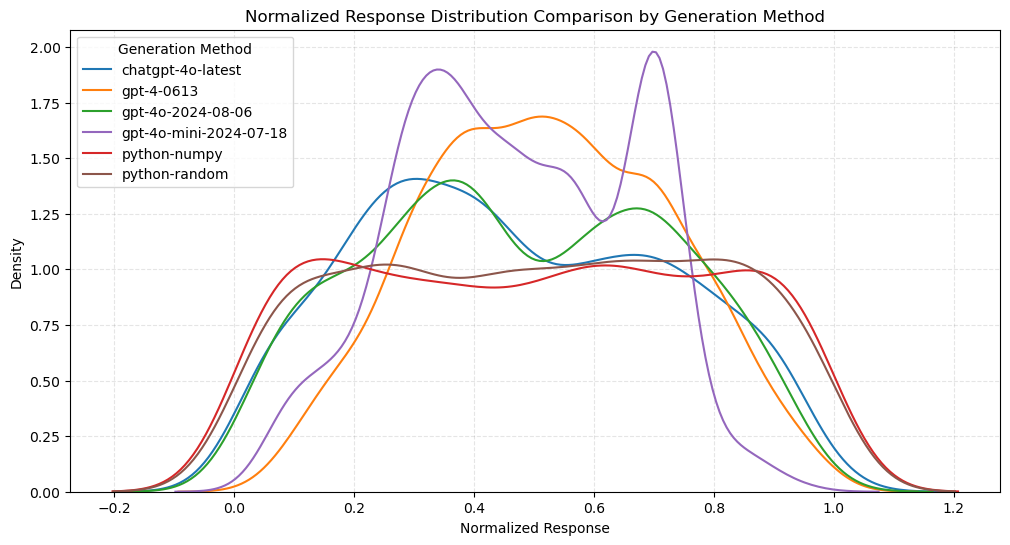

In [15]:
plt.figure(figsize=(12, 6))

# Create KDE plot for each generation method
for method in sorted(df['generation_method'].unique()):
    sns.kdeplot(data=df[df['generation_method'] == method]['normalized_response'],
                alpha=1, label=method, palette=custom_palette[method])

# Set plot details
plt.xlabel('Normalized Response')
plt.ylabel('Density')
plt.title('Normalized Response Distribution Comparison by Generation Method')
plt.legend(title='Generation Method', loc='upper left')
plt.grid(True, which='both', ls='--', c='gray', alpha=0.2)
plt.savefig('imgs/normalized_response_distribution_comparison_all_methods.png')
plt.show()

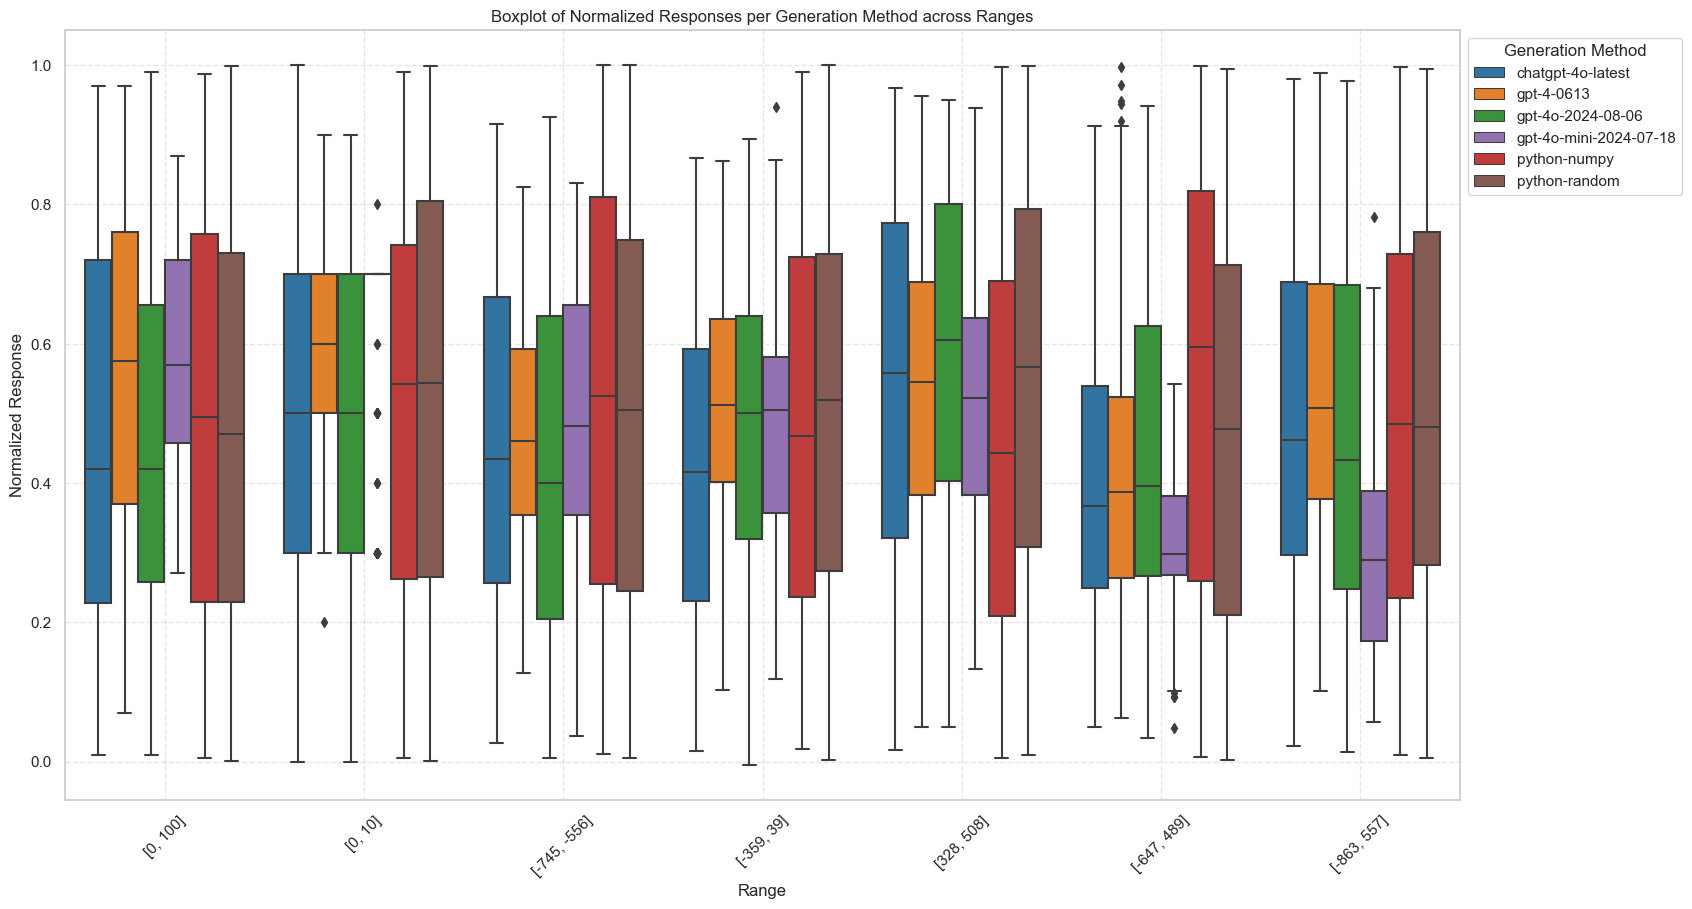

In [30]:
# Create a new column for range labels
df['range_label'] = df.apply(lambda x: f"[{x['range_min']}, {x['range_max']}]", axis=1)

# sort generation methods by alphabetical order
df['generation_method'] = pd.Categorical(df['generation_method'], categories=sorted(df['generation_method'].unique()))

plt.figure(figsize=(18, 10))
sns.boxplot(x='range_label', y='normalized_response', hue='generation_method', data=df, palette=custom_palette)
plt.title('Boxplot of Normalized Responses per Generation Method across Ranges')
plt.xlabel('Range')
plt.ylabel('Normalized Response')
plt.grid(True, which='both', ls='--', c='gray', alpha=0.2)
# plt.legend(title='Generation Method', loc='upper right')
# plt.legend(title='Generation Method', loc='upper left')
plt.legend(title="Generation Method", loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
# plt.savefig('imgs/boxplot_normalized_response_vs_range.png')
plt.show()

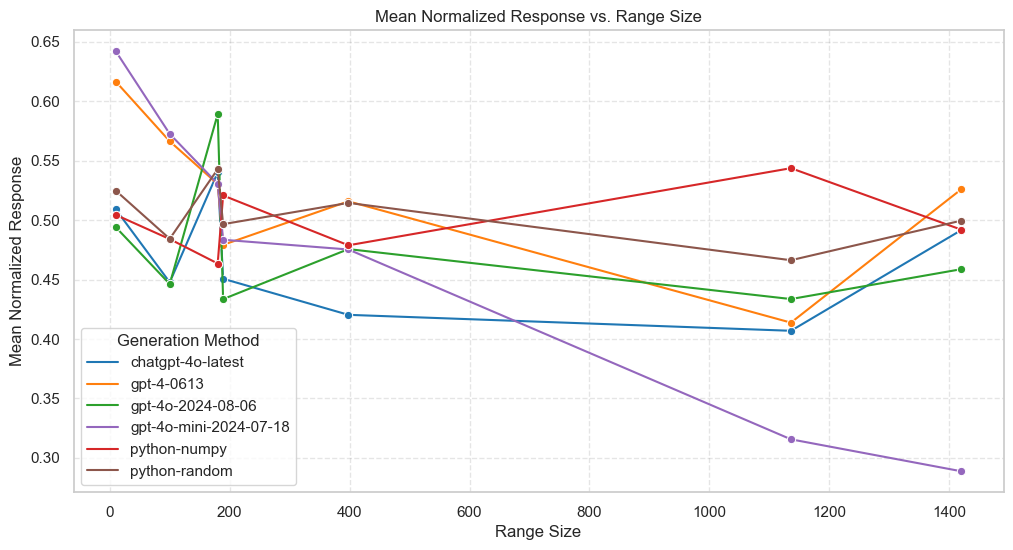

In [29]:
# Calculate mean normalized response per model and range size
mean_response = df.groupby(['generation_method', 'range_size'])['normalized_response'].mean().reset_index()

# sort methods by alphabetical order
mean_response['generation_method'] = pd.Categorical(mean_response['generation_method'], categories=sorted(mean_response['generation_method'].unique()))

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_response, x='range_size', y='normalized_response', hue='generation_method', marker='o', palette=custom_palette, alpha=1)
plt.title('Mean Normalized Response vs. Range Size')
plt.xlabel('Range Size')
plt.ylabel('Mean Normalized Response')
plt.grid(True, which='both', ls='--', c='gray', alpha=0.2)
plt.legend(title='Generation Method', loc='lower left')
plt.savefig('imgs/mean_normalized_response_vs_range_size.png')
plt.show()

In [18]:
# Ensure 'response' is an integer (if it's not already)
df['response_int'] = df['response'].astype(int)

# Function to check if a number is prime
def is_prime(n):
    n = abs(int(n))  # Consider absolute value and ensure it's an integer
    if n <= 1:
        return False
    if n == 2:
        return True
    # Even numbers greater than 2 are not prime
    if n % 2 == 0:
        return False
    sqrt_n = int(np.sqrt(n)) + 1
    # Check odd numbers up to the square root of n
    for i in range(3, sqrt_n, 2):
        if n % i == 0:
            return False
    return True

# Apply the is_prime function to the 'response_int' column
df['is_prime'] = df['response_int'].apply(is_prime)

# Check if the number ends with 5 or 0
df['ends_with_5_or_0'] = df['response_int'].apply(lambda x: str(abs(x))[-1] in ['0', '5'])

# Now compute frequencies across generation methods
# Multiply by 100 to get percentages

# Frequency of prime numbers
prime_freq = df.groupby('generation_method')['is_prime'].mean().reset_index()
prime_freq['prime_percentage'] = prime_freq['is_prime'] * 100

# Frequency of numbers ending with 5 or 0
ends_with_5_or_0_freq = df.groupby('generation_method')['ends_with_5_or_0'].mean().reset_index()
ends_with_5_or_0_freq['ends_with_5_or_0_percentage'] = ends_with_5_or_0_freq['ends_with_5_or_0'] * 100

# Display the frequencies
print("Frequency of Prime Numbers by Generation Method:")
prime_freq[['generation_method', 'prime_percentage']]

Frequency of Prime Numbers by Generation Method:


,generation_method,prime_percentage
0,chatgpt-4o-latest,25.714286
1,gpt-4-0613,26.571429
2,gpt-4o-2024-08-06,25.428571
3,gpt-4o-mini-2024-07-18,29.428571
4,python-numpy,20.857143
5,python-random,23.357143


In [19]:
print("\nFrequency of Numbers Ending with 5 or 0 by Generation Method:")
ends_with_5_or_0_freq[['generation_method', 'ends_with_5_or_0_percentage']]


Frequency of Numbers Ending with 5 or 0 by Generation Method:


,generation_method,ends_with_5_or_0_percentage
0,chatgpt-4o-latest,13.500000
1,gpt-4-0613,17.071429
2,gpt-4o-2024-08-06,14.214286
3,gpt-4o-mini-2024-07-18,7.214286
4,python-numpy,20.071429
5,python-random,18.214286


In [20]:
# # # Helper functions
# # def is_prime(n):
# #     n = abs(int(n))
# #     if n <= 1:
# #         return False
# #     if n == 2:
# #         return True
# #     if n % 2 == 0:
# #         return False
# #     for i in range(3, int(np.sqrt(n)) + 1, 2):
# #         if n % i == 0:
# #             return False
# #     return True

# # def calculate_range_statistics(range_min, range_max):
# #     # Generate the range of numbers for analysis
# #     numbers = range(range_min, range_max + 1)
# #     total_numbers = len(numbers)
    
# #     # Calculate the percentage of primes in the range
# #     prime_count = sum(is_prime(n) for n in numbers)
# #     prime_percentage = (prime_count / total_numbers) * 100
    
# #     # Calculate the percentage of numbers ending in 0
# #     ends_with_0_count = sum(str(abs(n)).endswith('0') for n in numbers)
# #     ends_with_0_percentage = (ends_with_0_count / total_numbers) * 100
    
# #     # Calculate the percentage of numbers ending in 5 or 0
# #     ends_with_5_or_0_count = sum(str(abs(n))[-1] in ['0', '5'] for n in numbers)
# #     ends_with_5_or_0_percentage = (ends_with_5_or_0_count / total_numbers) * 100
    
# #     # Calculate the percentage of round numbers (multiples of 10)
# #     round_number_count = sum(n % 10 == 0 for n in numbers)
# #     round_number_percentage = (round_number_count / total_numbers) * 100
    
# #     return {
# #         'prime_percentage_range': prime_percentage,
# #         'ends_with_0_percentage_range': ends_with_0_percentage,
# #         'ends_with_5_or_0_percentage_range': ends_with_5_or_0_percentage,
# #         'round_number_percentage_range': round_number_percentage
# #     }

# # # Create new columns for special number properties in the dataset
# # df['response_int'] = df['response'].astype(int)
# # df['is_prime'] = df['response_int'].apply(is_prime)
# # df['ends_with_5_or_0'] = df['response_int'].apply(lambda x: str(abs(x))[-1] in ['0', '5'])

# # # Calculate the statistics for each range and compare with the generated values
# # comparison_results = []

# # for (range_min, range_max), group in df.groupby(['range_min', 'range_max']):
# #     # Calculate the ground truth percentages for the range
# #     range_stats = calculate_range_statistics(range_min, range_max)
    
# #     # Calculate percentages of each special number type generated by each method within this range
# #     for method, method_group in group.groupby('generation_method'):
# #         total_count = len(method_group)
        
# #         # Calculate percentage of each special number type in the generated data
# #         prime_percentage_method = method_group['is_prime'].mean() * 100
# #         ends_with_5_or_0_percentage_method = method_group['ends_with_5_or_0'].mean() * 100
        
# #         # Store the comparison data
# #         comparison_results.append({
# #             'range_min': range_min,
# #             'range_max': range_max,
# #             'generation_method': method,
# #             'prime_percentage_range': range_stats['prime_percentage_range'],
# #             'prime_percentage_method': prime_percentage_method,
# #             'ends_with_0_percentage_range': range_stats['ends_with_0_percentage_range'],
# #             'ends_with_0_percentage_method': ends_with_0_percentage_method,
# #             'ends_with_5_or_0_percentage_range': range_stats['ends_with_5_or_0_percentage_range'],
# #             'ends_with_5_or_0_percentage_method': ends_with_5_or_0_percentage_method,
# #             'round_number_percentage_range': range_stats['round_number_percentage_range'],
# #             'round_number_percentage_method': round_number_percentage_method
# #         })

# # # Convert the results into a DataFrame for easier analysis
# # comparison_df = pd.DataFrame(comparison_results)

# # # Display the comparison DataFrame
# # print("Comparison of Special Number Frequencies Between Generation Methods and Expected Range Percentages:")
# # comparison_df

# import pandas as pd
# import numpy as np

# # Helper function to determine if a number is prime
# def is_prime(n):
#     n = abs(int(n))
#     if n <= 1:
#         return False
#     if n == 2:
#         return True
#     if n % 2 == 0:
#         return False
#     for i in range(3, int(np.sqrt(n)) + 1, 2):
#         if n % i == 0:
#             return False
#     return True

# # Create new columns for special number properties in the dataset
# df['response_int'] = df['response'].astype(int)
# df['is_prime'] = df['response_int'].apply(is_prime)
# df['ends_with_0'] = df['response_int'].apply(lambda x: str(abs(x)).endswith('0'))
# df['ends_with_5_or_0'] = df['response_int'].apply(lambda x: str(abs(x))[-1] in ['0', '5'])
# df['is_round_number'] = df['response_int'].apply(lambda x: x % 10 == 0)

# # Add a combined range label to the DataFrame for each row
# df['range_label'] = df.apply(lambda row: f"[{row['range_min']}, {row['range_max']}]", axis=1)

# # Calculate statistics for each range and compare with generated values
# comparison_results = []

# for (range_min, range_max), group in df.groupby(['range_min', 'range_max']):
#     # Calculate ground truth percentages for this specific range
#     range_stats = calculate_range_statistics(range_min, range_max)
    
#     # Calculate percentages of each special number type generated by each method within this range
#     for method, method_group in group.groupby('generation_method'):
#         total_count = len(method_group)
        
#         # Calculate method-specific percentages
#         prime_percentage_method = method_group['is_prime'].mean() * 100
#         ends_with_0_percentage_method = method_group['ends_with_0'].mean() * 100
#         ends_with_5_or_0_percentage_method = method_group['ends_with_5_or_0'].mean() * 100
#         round_number_percentage_method = method_group['is_round_number'].mean() * 100
        
#         # Store the results in a dictionary for easy comparison
#         comparison_results.append({
#             'range_min': range_min,
#             'range_max': range_max,
#             'range_label': f"[{range_min}, {range_max}]",  # Use combined range label for clarity
#             'generation_method': method,
#             'prime_percentage_range': range_stats['prime_percentage_range'],
#             'prime_percentage_method': prime_percentage_method,
#             'ends_with_0_percentage_range': range_stats['ends_with_0_percentage_range'],
#             'ends_with_0_percentage_method': ends_with_0_percentage_method,
#             'ends_with_5_or_0_percentage_range': range_stats['ends_with_5_or_0_percentage_range'],
#             'ends_with_5_or_0_percentage_method': ends_with_5_or_0_percentage_method,
#             'round_number_percentage_range': range_stats['round_number_percentage_range'],
#             'round_number_percentage_method': round_number_percentage_method
#         })

# # Convert the results into a DataFrame for easier analysis
# comparison_df = pd.DataFrame(comparison_results)

# # Display the comparison DataFrame to verify results
# print("Comparison of Special Number Frequencies Between Generation Methods and Expected Range Percentages:")
# comparison_df

In [21]:
# unique generation methods
for method in df['generation_method'].unique():
    print(f"Number of rows for {method}: {df[df['generation_method'] == method].shape[0]}")

print()
# unique range_min and range_max pairs
for (range_min, range_max), group in df.groupby(['range_min', 'range_max']):
    print(f"Number of rows for range {range_min} to {range_max}: {group.shape[0]}")

Number of rows for chatgpt-4o-latest: 1400
Number of rows for gpt-4o-2024-08-06: 1400
Number of rows for gpt-4-0613: 1400
Number of rows for gpt-4o-mini-2024-07-18: 1400
Number of rows for python-random: 1400
Number of rows for python-numpy: 1400

Number of rows for range -863 to 557: 1200
Number of rows for range -745 to -556: 1200
Number of rows for range -647 to 489: 1200
Number of rows for range -359 to 39: 1200
Number of rows for range 0 to 10: 1200
Number of rows for range 0 to 100: 1200
Number of rows for range 328 to 508: 1200


In [22]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set plot style
# sns.set(style="whitegrid")

# # Function to calculate the ground truth statistics for a specified range
# def calculate_range_statistics(range_min, range_max):
#     numbers = range(range_min, range_max + 1)
#     total_numbers = len(numbers)
    
#     # Calculate percentage of primes in the range
#     prime_count = sum(is_prime(n) for n in numbers)
#     prime_percentage = (prime_count / total_numbers) * 100
    
#     # Calculate percentage of numbers ending in 0
#     ends_with_0_count = sum(str(abs(n)).endswith('0') for n in numbers)
#     ends_with_0_percentage = (ends_with_0_count / total_numbers) * 100
    
#     # Calculate percentage of numbers ending in 5 or 0
#     ends_with_5_or_0_count = sum(str(abs(n))[-1] in ['0', '5'] for n in numbers)
#     ends_with_5_or_0_percentage = (ends_with_5_or_0_count / total_numbers) * 100
    
#     # Calculate percentage of round numbers (multiples of 10)
#     round_number_count = sum(n % 10 == 0 for n in numbers)
#     round_number_percentage = (round_number_count / total_numbers) * 100
    
#     return {
#         'prime_percentage_range': prime_percentage,
#         'ends_with_0_percentage_range': ends_with_0_percentage,
#         'ends_with_5_or_0_percentage_range': ends_with_5_or_0_percentage,
#         'round_number_percentage_range': round_number_percentage
#     }

# # Function to plot comparisons for a specific metric
# def plot_comparison(df, range_column, method_column, true_column, method_percentage_column, title):
#     plt.figure(figsize=(12, 6))
    
#     # Melt the DataFrame to long format for plotting
#     df_melted = df.melt(id_vars=[range_column, method_column], 
#                         value_vars=[true_column, method_percentage_column], 
#                         var_name="Type", 
#                         value_name="Percentage")
    
#     # Plot using seaborn
#     sns.barplot(
#         data=df_melted,
#         x=range_column,
#         y="Percentage",
#         hue=method_column,
#         # ci=None  # Remove confidence intervals for cleaner bars
#     )
#     plt.title(title)
#     plt.xlabel("Range")
#     plt.ylabel("Percentage (%)")
#     plt.xticks(rotation=45, ha="right")
#     plt.legend(title="Generation Method")
#     plt.tight_layout()  # Adjust layout for readability
#     plt.show()

# # Adjusted calculation code for relative percentages
# comparison_results = []

# for (range_min, range_max), group in df.groupby(['range_min', 'range_max']):
#     # Calculate ground truth percentages for this specific range
#     range_stats = calculate_range_statistics(range_min, range_max)
    
#     # Get the count of primes and numbers ending in 5 or 0 in the range for relative calculation
#     range_prime_count = sum(is_prime(n) for n in range(range_min, range_max + 1))
#     range_ends_with_5_or_0_count = sum(str(abs(n))[-1] in ['0', '5'] for n in range(range_min, range_max + 1))
    
#     # Calculate percentages of each special number type generated by each method within this range
#     for method, method_group in group.groupby('generation_method'):
#         total_count = len(method_group)
        
#         # Calculate relative percentage of primes generated by this method in the range
#         generated_prime_count = method_group['is_prime'].sum()
#         prime_percentage_method = (generated_prime_count / range_prime_count * 100) if range_prime_count > 0 else 0
        
#         # Calculate relative percentage of numbers ending with 5 or 0 generated by this method in the range
#         generated_ends_with_5_or_0_count = method_group['ends_with_5_or_0'].sum()
#         ends_with_5_or_0_percentage_method = (generated_ends_with_5_or_0_count / range_ends_with_5_or_0_count * 100) if range_ends_with_5_or_0_count > 0 else 0
        
#         # Store the comparison data
#         comparison_results.append({
#             'range_min': range_min,
#             'range_max': range_max,
#             'range_label': f"[{range_min}, {range_max}]",  # Use combined range label for clarity
#             'generation_method': method,
#             'prime_percentage_range': range_stats['prime_percentage_range'],
#             'prime_percentage_method': prime_percentage_method,
#             'ends_with_5_or_0_percentage_range': range_stats['ends_with_5_or_0_percentage_range'],
#             'ends_with_5_or_0_percentage_method': ends_with_5_or_0_percentage_method,
#         })

# # Convert the results into a DataFrame for easier analysis
# comparison_df = pd.DataFrame(comparison_results)

In [23]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Set plot style
# sns.set(style="whitegrid")

# # Adjusted function to include log scale and data labels with better readability
# def plot_comparison_log_scale(df, range_column, method_column, true_column, method_percentage_column, title):
#     plt.figure(figsize=(12, 8))
    
#     # Melt the DataFrame to long format for plotting
#     df_melted = df.melt(id_vars=[range_column, method_column], 
#                         value_vars=[true_column, method_percentage_column], 
#                         var_name="Type", 
#                         value_name="Percentage")
    
#     # Plot using seaborn with log scale
#     ax = sns.barplot(
#         data=df_melted,
#         x=range_column,
#         y="Percentage",
#         hue=method_column,
#         ci=None,
#         palette=custom_palette,
#     )
    
#     # Set title and labels
#     ax.set_title(title)
#     ax.set_xlabel("Range")
#     ax.set_ylabel("Empirical Probability (%)")
#     ax.set_yscale("log")  # Set y-axis to logarithmic scale
#     plt.xticks(rotation=45, ha="right")
    
#     # Calculate the maximum height for setting ylim to avoid cutoff
#     max_height = df_melted['Percentage'].max() * 1.2
#     ax.set_ylim(1, max_height)  # Set lower limit to 1 to avoid log(0) issues
    
#     # Add data labels on top of bars with buffer for readability
#     for p in ax.patches:
#         height = p.get_height()
#         if not np.isnan(height) and height > 0:  # Avoid placing labels on empty bars
#             ax.annotate(f'{height:.1f}%', 
#                         (p.get_x() + p.get_width() / 2., height * 1.1),  # Position slightly above the bar
#                         # (p.get_x() + p.get_width() / 2., 2),  # Position slightly above the bar
#                         ha='center', va='bottom', fontsize=10, color='black', rotation=90)
    
#     # Show the plot
#     plt.legend(title="Generation Method")
#     plt.tight_layout()  # Adjust layout for readability
#     plt.savefig(f"imgs/{title}.png", dpi=300)
#     plt.show()

# # Plot for prime numbers using log scale
# plot_comparison_log_scale(
#     comparison_df,
#     range_column="range_label",
#     method_column="generation_method",
#     true_column="prime_percentage_range",
#     method_percentage_column="prime_percentage_method",
#     title="Empirical Probability vs Expected Value of Prime Numbers by Range and Generation Method",
# )

# # Plot for numbers ending with 5 or 0 using log scale
# plot_comparison_log_scale(
#     comparison_df,
#     range_column="range_label",
#     method_column="generation_method",
#     true_column="ends_with_5_or_0_percentage_range",
#     method_percentage_column="ends_with_5_or_0_percentage_method",
#     title="Empirical Probability vs Expected Value of Numbers Ending with 5 or 0 by Range and Generation Method",
# )


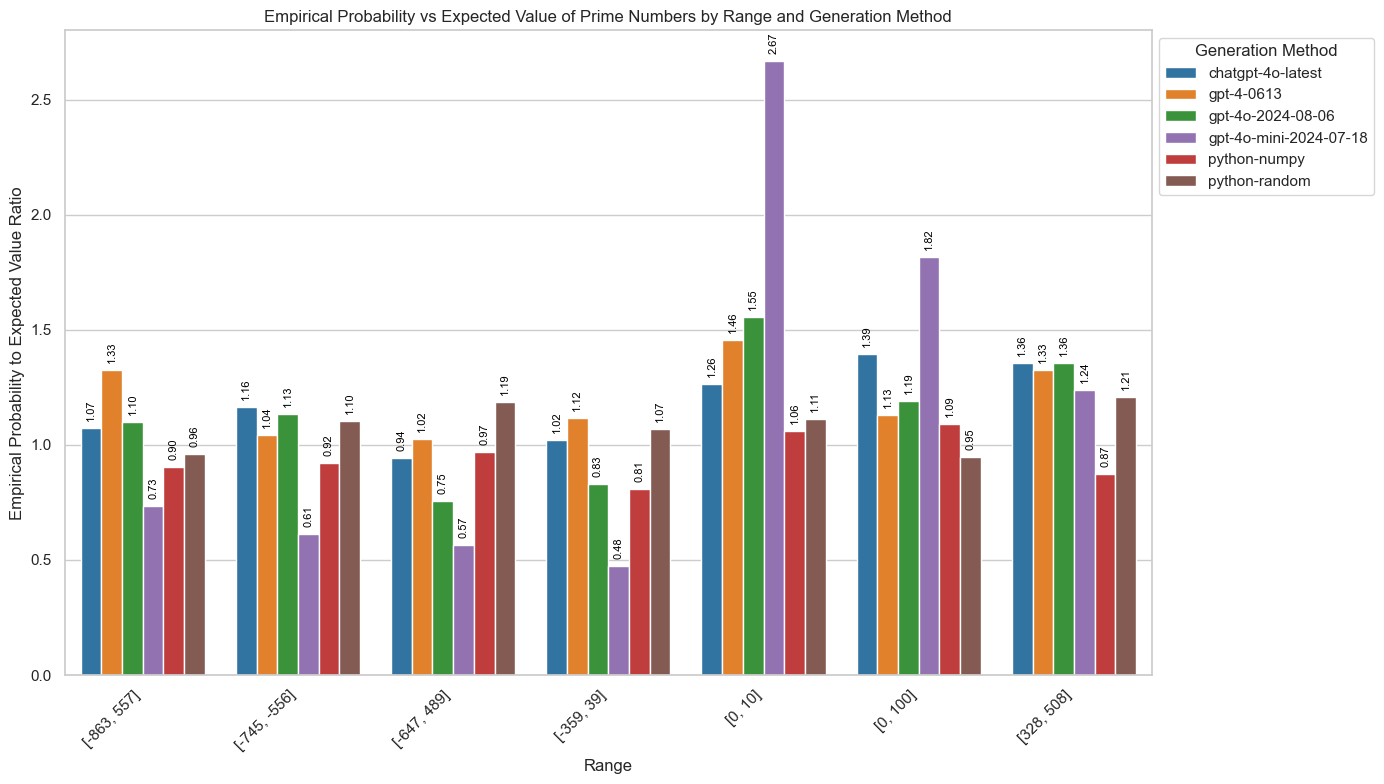

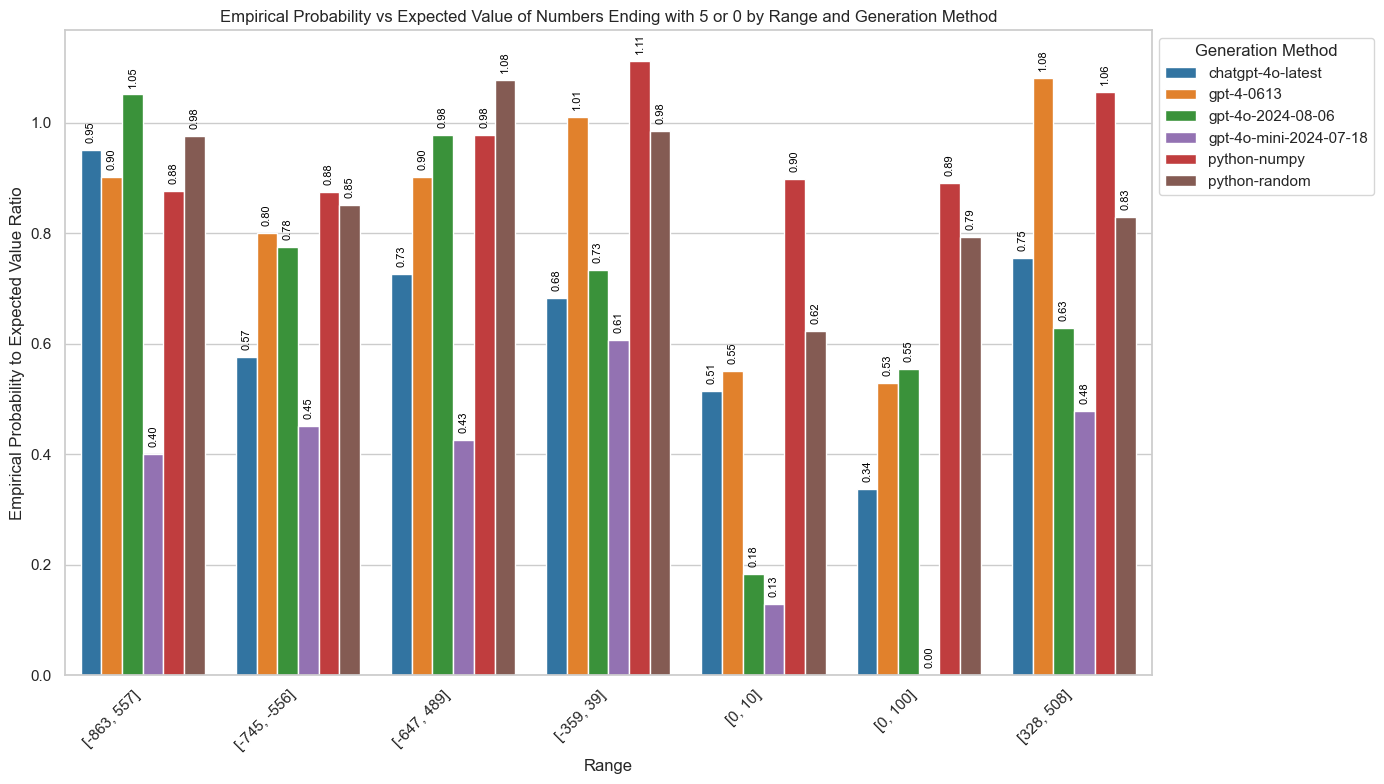

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")

# Function to calculate the ground truth statistics for a specified range
def calculate_range_statistics(range_min, range_max):
    numbers = range(range_min, range_max + 1)
    total_numbers = len(numbers)
    
    # Calculate percentage of primes in the range
    prime_count = sum(is_prime(n) for n in numbers)
    prime_percentage = (prime_count / total_numbers) * 100
    
    # Calculate percentage of numbers ending in 0
    ends_with_0_count = sum(str(abs(n)).endswith('0') for n in numbers)
    ends_with_0_percentage = (ends_with_0_count / total_numbers) * 100
    
    # Calculate percentage of numbers ending in 5 or 0
    ends_with_5_or_0_count = sum(str(abs(n))[-1] in ['0', '5'] for n in numbers)
    ends_with_5_or_0_percentage = (ends_with_5_or_0_count / total_numbers) * 100
    
    return {
        'prime_percentage_range': prime_percentage,
        'ends_with_5_or_0_percentage_range': ends_with_5_or_0_percentage
    }

# Adjusted calculation code for empirical/theoretical ratios
comparison_results = []

for (range_min, range_max), group in df.groupby(['range_min', 'range_max']):
    # Calculate theoretical percentages for this specific range
    range_stats = calculate_range_statistics(range_min, range_max)
    
    # Get the count of primes and numbers ending in 5 or 0 in the range for relative calculation
    range_prime_count = sum(is_prime(n) for n in range(range_min, range_max + 1))
    range_ends_with_5_or_0_count = sum(str(abs(n))[-1] in ['0', '5'] for n in range(range_min, range_max + 1))
    
    # Calculate empirical/theoretical ratios of each special number type generated by each method within this range
    for method, method_group in group.groupby('generation_method'):
        # Calculate empirical likelihood (percentage) of primes generated by this method in the range
        generated_prime_count = method_group['is_prime'].sum()
        prime_percentage_method = (generated_prime_count / len(method_group) * 100)
        prime_ratio = prime_percentage_method / range_stats['prime_percentage_range'] if range_stats['prime_percentage_range'] > 0 else np.nan
        
        # Calculate empirical likelihood (percentage) of numbers ending with 5 or 0 generated by this method in the range
        generated_ends_with_5_or_0_count = method_group['ends_with_5_or_0'].sum()
        ends_with_5_or_0_percentage_method = (generated_ends_with_5_or_0_count / len(method_group) * 100)
        ends_with_5_or_0_ratio = ends_with_5_or_0_percentage_method / range_stats['ends_with_5_or_0_percentage_range'] if range_stats['ends_with_5_or_0_percentage_range'] > 0 else np.nan
        
        # Store the comparison data
        comparison_results.append({
            'range_min': range_min,
            'range_max': range_max,
            'range_label': f"[{range_min}, {range_max}]",  # Use combined range label for clarity
            'generation_method': method,
            'prime_ratio': prime_ratio,
            'ends_with_5_or_0_ratio': ends_with_5_or_0_ratio,
        })

# Convert the results into a DataFrame for easier analysis
comparison_df = pd.DataFrame(comparison_results)

def plot_ratio_comparison(df, range_column, method_column, ratio_column, title, legend_outside=False):
    plt.figure(figsize=(14, 8))
    
    # Plot using seaborn
    ax = sns.barplot(
        data=df,
        x=range_column,
        y=ratio_column,
        hue=method_column,
        errorbar=None,  # Updated from ci=None
        palette=custom_palette,
        alpha=1,
    )
    
    # Add data labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):  # Avoid placing labels on empty bars
            ax.annotate(f'{height:.2f}', 
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom',
                       fontsize=8, color='black',
                       rotation=90,
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords='offset points')

    plt.title(title)
    plt.xlabel("Range")
    plt.ylabel("Empirical Probability to Expected Value Ratio")
    plt.xticks(rotation=45, ha="right")
    
    if legend_outside:
        plt.legend(title="Generation Method", loc='upper left', bbox_to_anchor=(1, 1))
    else:
        plt.legend(title="Generation Method")
    
    plt.tight_layout()  # Adjust layout for readability
    plt.savefig(f"imgs/{title}.png", dpi=300, bbox_inches='tight')
    plt.show()

# Plot for prime number ratio
plot_ratio_comparison(
    comparison_df,
    range_column="range_label",
    method_column="generation_method",
    ratio_column="prime_ratio",
    title="Empirical Probability vs Expected Value of Prime Numbers by Range and Generation Method",
    legend_outside=True
)

# Plot for numbers ending with 5 or 0 ratio
plot_ratio_comparison(
    comparison_df,
    range_column="range_label",
    method_column="generation_method",
    ratio_column="ends_with_5_or_0_ratio",
    title="Empirical Probability vs Expected Value of Numbers Ending with 5 or 0 by Range and Generation Method",
    legend_outside=True
)